###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

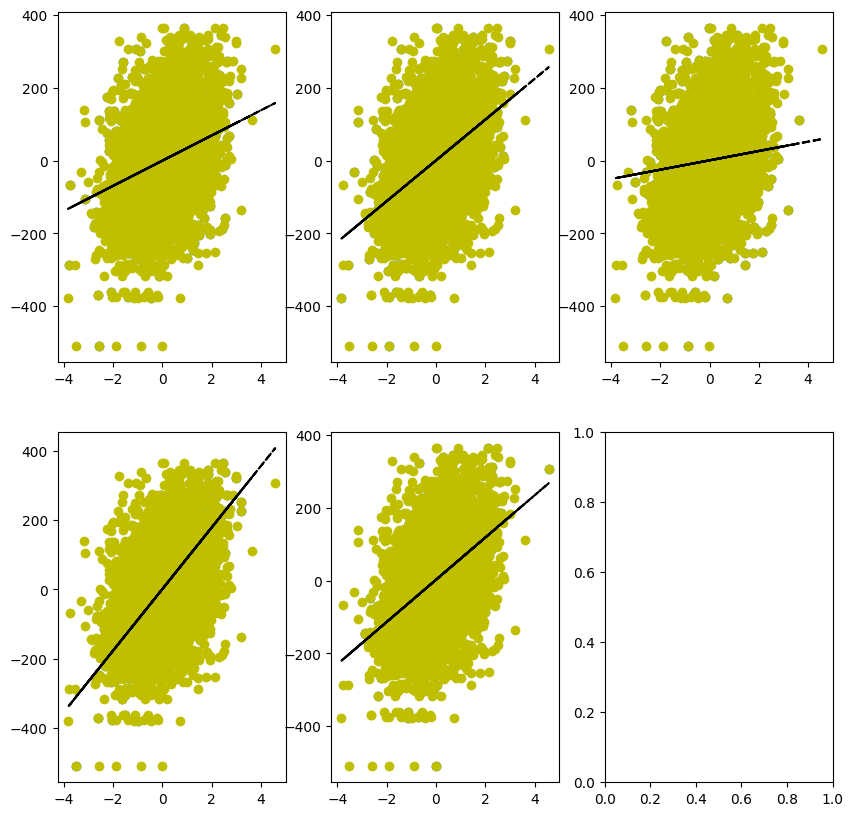

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression as mk
x,y = mk(n_samples=1000, n_features=5)

fig,ax= plt.subplots(2,3,figsize=(10,10))
for i in range(5):
  plt.subplot(231+i)
  plt.scatter(x[:,i],y)
  m, b = np.polyfit(x[:,i], y, 1)
  plt.plot(x, y, 'yo', x, m*x+b, '--k')

### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

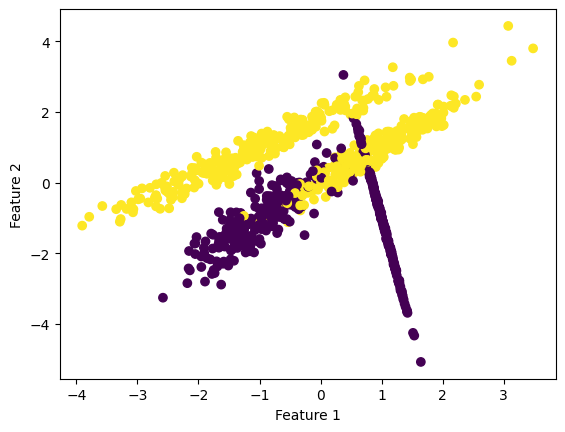

In [2]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

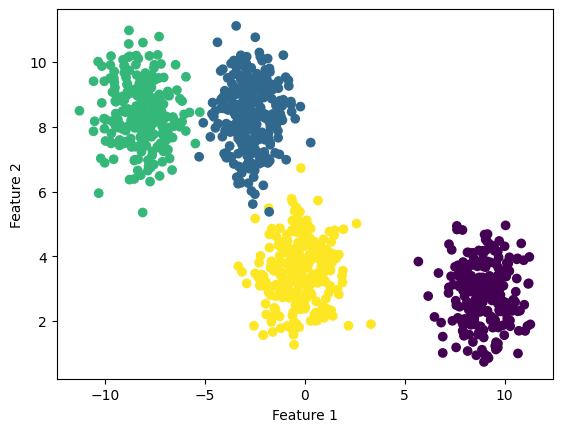

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [5]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.worldometers.info/coronavirus/'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', id='main_table_countries_today')

headers = [header.text.strip() for header in table.find_all('th')]
rows = table.find_all('tr')

data = []

for row in rows:
    cells = row.find_all('td')
    if len(cells) > 0:
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)

df = pd.DataFrame(data, columns=headers)
df = df[['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]
df.columns = ['Country', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']

def clean_and_convert(column):
    return pd.to_numeric(df[column].str.replace(',', '').str.replace('+', ''), errors='coerce').fillna(0).astype(int)

for column in ['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']:
    df[column] = clean_and_convert(column)
    
df    

,Country,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases
0,North America,North America,0,131889132,0,1695941,0,127665129,350,2528062
1,Asia,Asia,0,221500265,0,1553662,0,205673091,0,14273512
2,Europe,Europe,0,253406198,0,2101824,0,248754104,474,2550270
3,South America,South America,0,70200879,0,1367332,0,66683585,0,2149962
4,Oceania,Australia/Oceania,0,14895771,0,33015,0,14752388,0,110368
...,...,...,...,...,...,...,...,...,...,...
242,Total:,South America,0,70200879,0,1367332,0,66683585,0,2149962
243,Total:,Australia/Oceania,0,14895771,0,33015,0,14752388,0,110368
244,Total:,Africa,0,12860924,0,258892,0,12090808,0,511224
245,Total:,,0,721,0,15,0,706,0,0


# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Initial class distribution: Counter({0: 943, 1: 57})


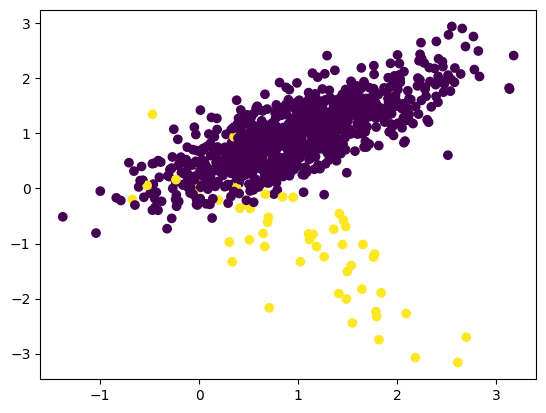

In [6]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=1,weights=[0.95, 0.05],random_state=1)
from collections import Counter
counter = Counter(y)
print("Initial class distribution:", counter)
plt.scatter(X[:, 0],X[:,1], c=y)
plt.show()

Class distribution after SMOTE: Counter({0: 943, 1: 235})


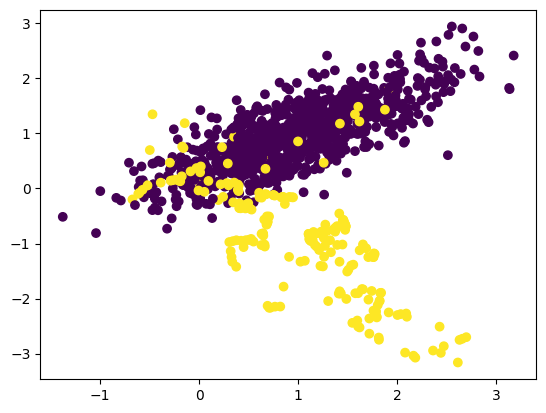

In [7]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.25, random_state=1) 
X_res, y_res = smote.fit_resample(X, y)

counter_res = Counter(y_res)
print("Class distribution after SMOTE:", counter_res)


plt.scatter(X_res[:, 0],X_res[:,1], c=y_res)
plt.show()

Class distribution after RandomUnderSampler: Counter({0: 705, 1: 235})


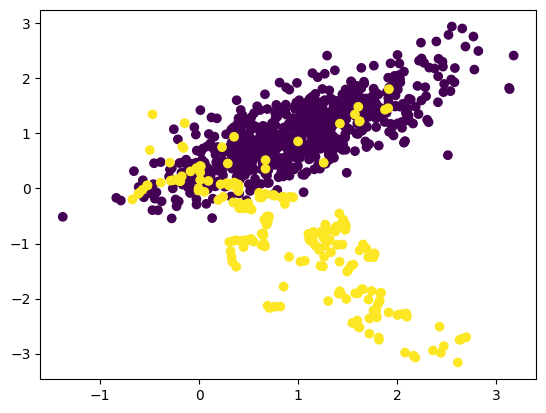

In [8]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.333, random_state=1)  # Majority class will be 3 times the minority class
X_resampled, y_resampled = rus.fit_resample(X_res, y_res)

counter_resampled = Counter(y_resampled)
print("Class distribution after RandomUnderSampler:", counter_resampled)

plt.scatter(X_resampled[:, 0],X_resampled[:,1], c=y_resampled)
plt.show()

##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.